In [ ]:
# Pustaka Program Decision Tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=160Aee3DDMtmgGVMXHOsTt4acG4U2Lms4')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# kolom target (label)
y = df['Species']

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
from re import X
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = SVC (kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
#akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
#laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



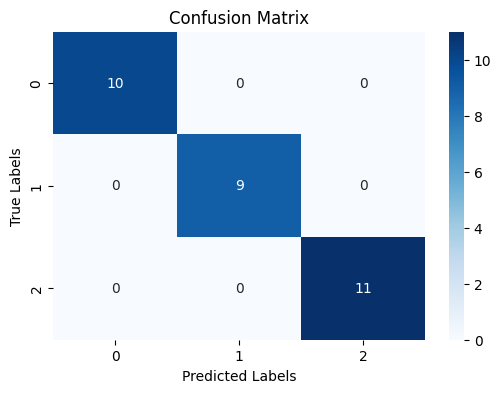

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (optional, agar lebih informatif)
# misalnya: class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

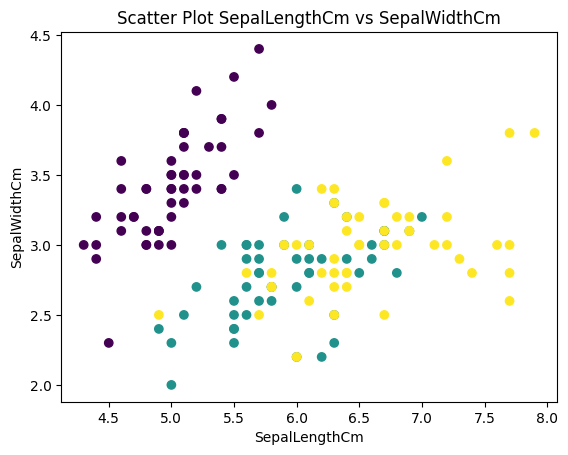

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Scatter Plot SepalLengthCm vs SepalWidthCm')
plt.show()

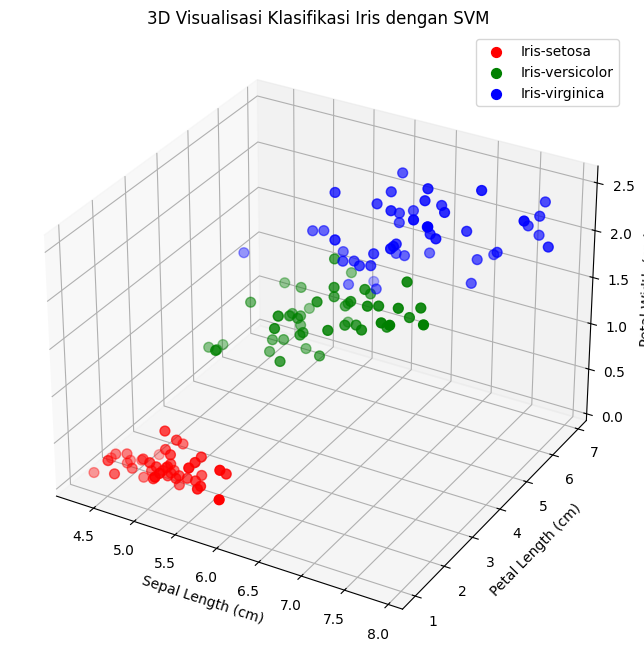

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()

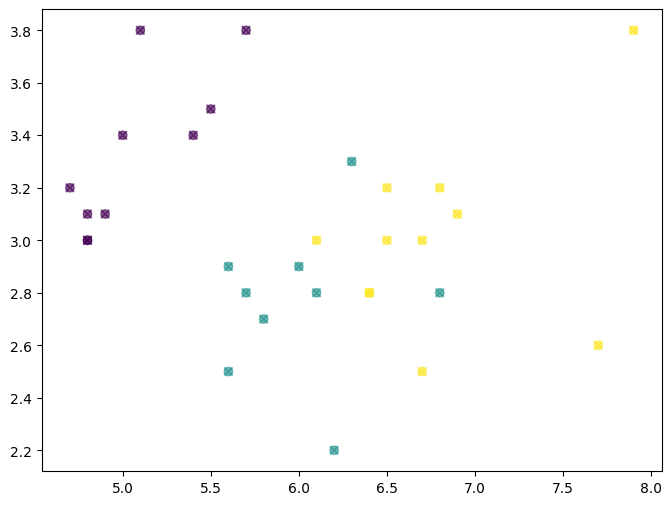

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Re-encode y_test for plotting
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6))

# Plot titik berdasarkan label asli
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
            c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6)

# Plot titik berdasarkan label hasil prediksi
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
            c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6)

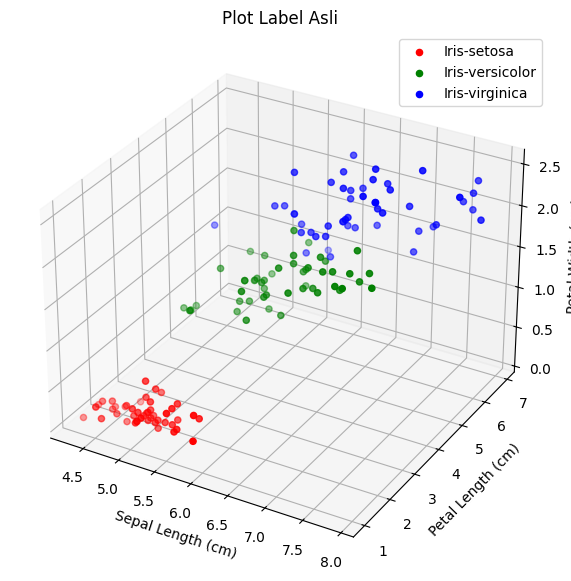

In [ ]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3. Encode label (ubah teks jadi angka) - Moved from another cell
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

fig = plt.figure(figsize=(18, 7))

# Plot 1: Label Asli
ax1 = fig.add_subplot(121, projection='3d')
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax1.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species
    )

ax1.set_title('Plot Label Asli')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_zlabel('Petal Width (cm)')
ax1.legend()

In [ ]:
# Plot 2: Label Prediksi
ax2 = fig.add_subplot(122, projection='3d')

# Tambahkan hasil prediksi ke DataFrame
# Create a new column and initialize with None
df['Predicted'] = None

# Assign predicted values to the rows that were in the test set
df.loc[X_test.index, 'Predicted'] = y_pred

# Visualisasi 3D berdasarkan hasil prediksi
# Warna untuk tiap kelas hasil prediksi
# Make sure to use the encoded predicted labels for coloring
# You might need to encode the 'Predicted' column if it's still in string format
if df['Predicted'].dtype == object:
    # Only encode the non-None values
    predicted_encoded = le.transform(df.loc[X_test.index, 'Predicted'])
    df.loc[X_test.index, 'PredictedEncoded'] = predicted_encoded
    plot_column = 'PredictedEncoded'
else:
    plot_column = 'Predicted'

# Plot tiap spesies dengan warna berbeda berdasarkan predicted label
# Use the original df and filter by the encoded predicted labels
for i, species_label in enumerate(labels):
    subset = df[df[plot_column] == i]
    ax2.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species_label
    )